In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'D:\Shorya\python\EDA Practice\California_housing.csv')
df.shape

(20640, 10)

In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8530,-118.35,33.90,31.0,1547.0,NaN,956.0,287.0,3.4698,225000.0,<1H OCEAN
17668,-121.88,37.32,45.0,2213.0,564.0,1920.0,514.0,3.2806,164200.0,<1H OCEAN
12731,-121.36,38.59,32.0,3303.0,480.0,1185.0,436.0,5.0508,225700.0,INLAND
18928,-122.19,38.09,8.0,614.0,118.0,278.0,115.0,6.3735,166300.0,NEAR BAY
13975,-116.76,34.23,10.0,4374.0,989.0,1020.0,376.0,2.6071,89000.0,INLAND
15898,-122.39,37.72,52.0,135.0,34.0,93.0,26.0,2.1484,181300.0,NEAR BAY
18776,-122.27,40.46,14.0,2633.0,530.0,1324.0,513.0,2.2768,78600.0,INLAND
7799,-118.08,33.90,42.0,1768.0,372.0,1155.0,368.0,3.5580,161100.0,<1H OCEAN
205,-122.23,37.79,48.0,1696.0,396.0,1481.0,343.0,2.0375,122500.0,NEAR BAY
20295,-119.19,34.16,34.0,2610.0,466.0,1543.0,433.0,3.9722,189000.0,NEAR OCEAN


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

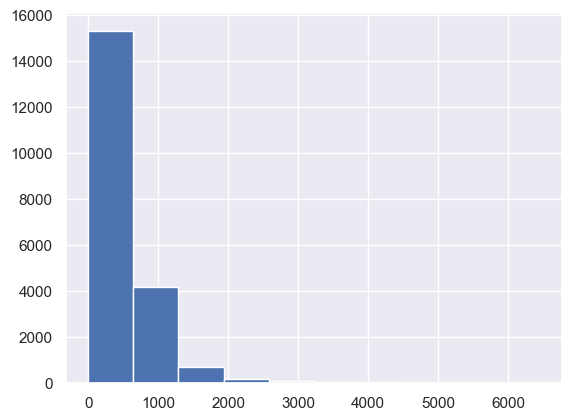

In [8]:
sns.set_style()
sns.set_theme(style='darkgrid')
df['total_bedrooms'].hist()

In [9]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

#### filling in null values with median as median is more reliable as we have observered a heavy right skew

In [11]:
df['total_bedrooms'].dtype

dtype('float64')

##### converting dtype of 'total_bedrooms'

In [13]:
df['total_bedrooms'] = pd.to_numeric(df['total_bedrooms'],errors='coerce')


In [14]:
df['total_bedrooms'].dtype

dtype('float64')

In [15]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [16]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##### Successfully handled missing values in 'total_bedrooms'

### Univariate Analysis

#### median_house_value

<Axes: xlabel='median_house_value', ylabel='Count'>

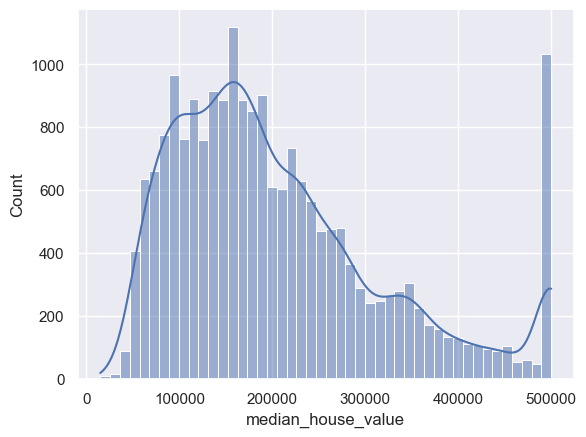

In [20]:
sns.histplot(x='median_house_value',data=df,kde=True)

#### The California Housing dataset shows a right-skewed distribution of home values primarily clustered between $100k–$250k, dominated by a strong linear correlation with median income.The prominent spike at $500k is an artificial data-entry cap, masking higher luxury values and requiring careful handling or removal during the preprocessing stage

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [23]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### median_income

<Axes: xlabel='median_income', ylabel='Count'>

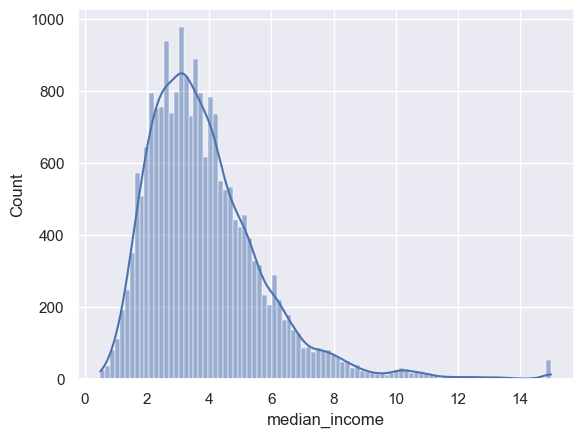

In [25]:
sns.histplot(x='median_income',data=df,kde=True)

##### The median_income is right-skewed and peaked at roughly 3.5, ($35,000). Like the house value, this feature is also artificially capped at 15.0 ($150,000), creating a tiny spike at the far right edge.

#### total_rooms

<Axes: xlabel='total_rooms', ylabel='Count'>

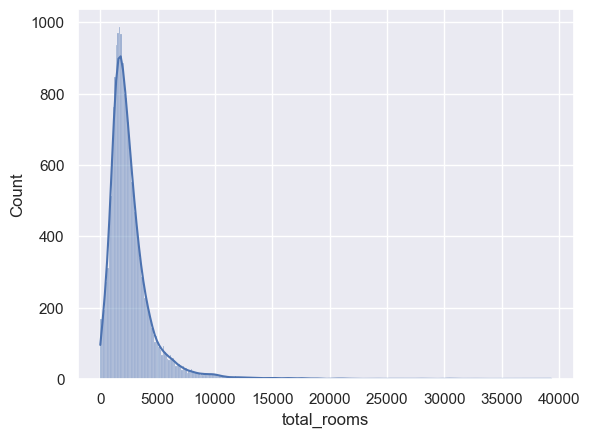

In [28]:
sns.histplot(x='total_rooms',data=df,kde=True)

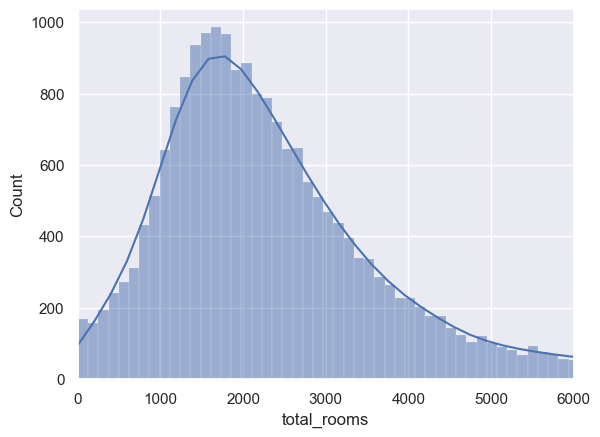

In [29]:
sns.histplot(x='total_rooms',data=df,kde=True)
plt.xlim(0, 6000)   # 👈 Zoom into 0–6000 range
plt.show()

#### there is a heavy right skew with a peak concentration between 1,500 and 1,700 rooms. However, some areas have over 6,000 rooms, which can significantly pull the mean away from the median.

#### total_bedrooms

<Axes: xlabel='total_bedrooms', ylabel='Count'>

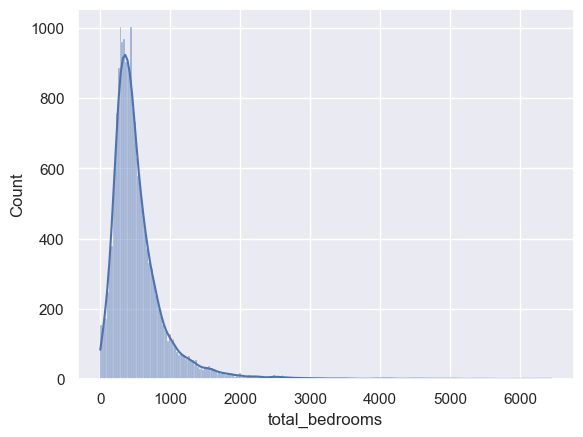

In [32]:
sns.histplot(x='total_bedrooms',data=df,kde=True)

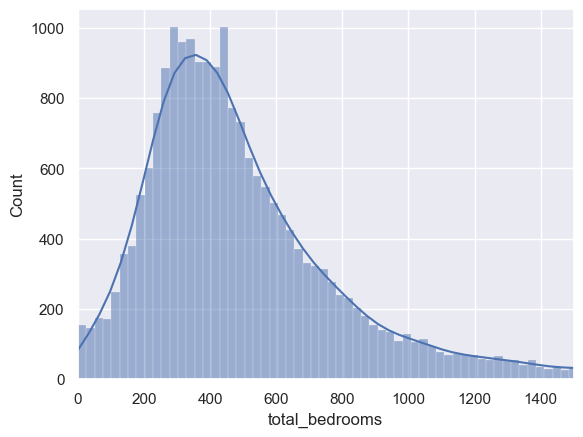

In [33]:
sns.histplot(x='total_bedrooms',data=df,kde=True)
plt.xlim(0,1500)
plt.show()

#### there is a heavy right skew with a peak concentration between 250-500 bedrooms. However, some areas have over 6,000 bedrooms, which can significantly pull the mean away from the median.

In [35]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#### housing_median_age

<Axes: xlabel='housing_median_age', ylabel='Count'>

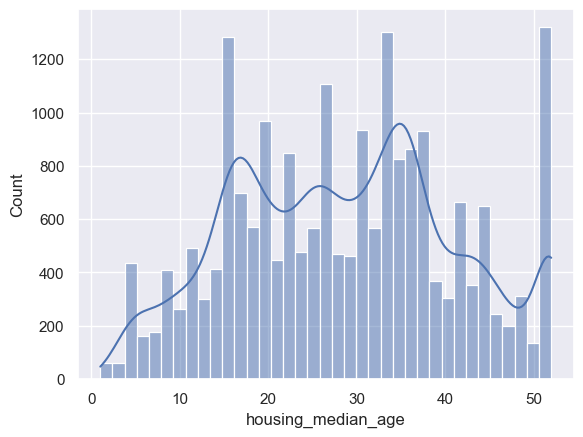

In [37]:
sns.histplot(x='housing_median_age',data=df,kde=True)

#### The housing_median_age distribution is bimodal, indicating two major historical housing booms around 15–20 and 30–35 years ago. Like the house value and income, this data is capped at 52 years, creating a final artificial spike for all older historical properties.the peak around 35 years ago likely reflects the massive suburban expansion of the 1980s, while the peak near 18 represents the development surge of the late 90s and early 2000s. 

#### households

<Axes: xlabel='households', ylabel='Count'>

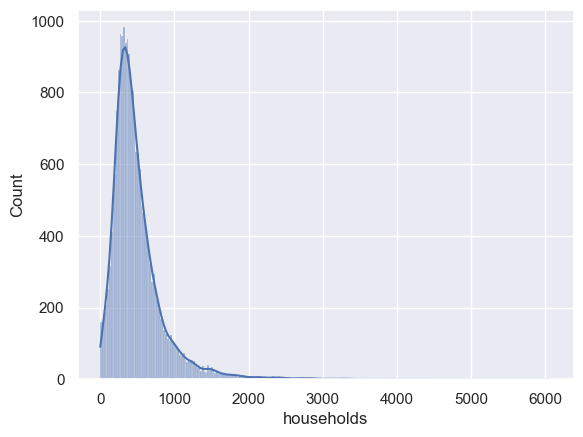

In [40]:
sns.histplot(x='households',data=df,kde=True)

#### right skew, mostly 500 households per area but there are a few areas that are heavily populated

#### Population- Should be right skewed as household is skewed as well

<Axes: xlabel='population', ylabel='Count'>

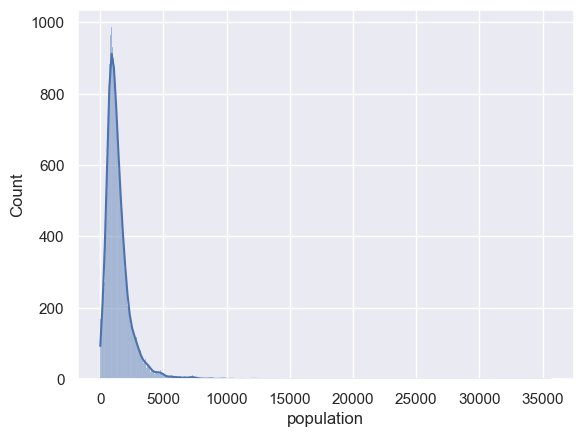

In [43]:
sns.histplot(x='population',data=df,kde=True)

#### longitude

<Axes: xlabel='longitude', ylabel='Count'>

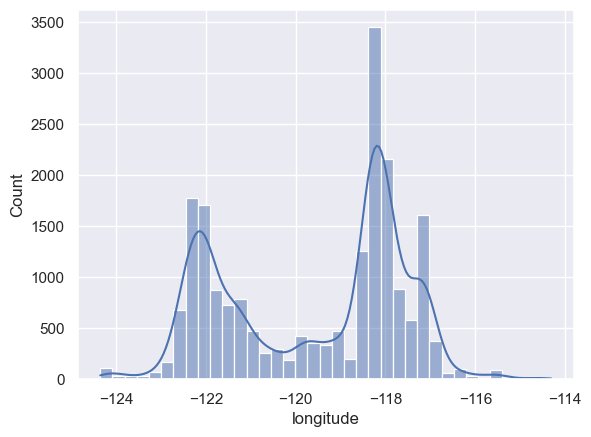

In [45]:
sns.histplot(x='longitude',data=df,kde=True)

#### in California, population is much more concentrated near water bodies than deep inland areas. the two spikes represent <1hr drive and near bay areas

#### latitude

<Axes: xlabel='latitude', ylabel='Count'>

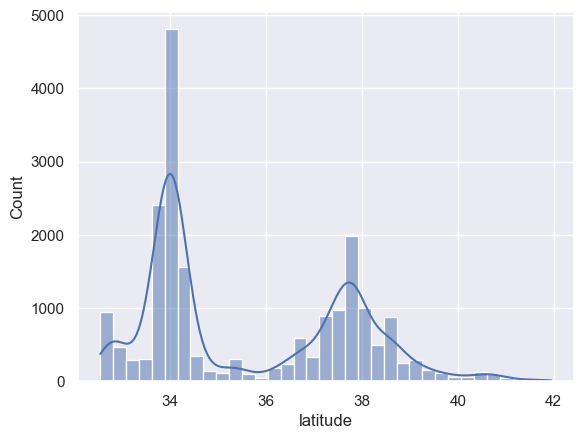

In [48]:
sns.histplot(x='latitude',data=df,kde=True)

**The Lower Peak (~34° Latitude): This corresponds to the Greater Los Angeles area and San Diego. This is the southern hub you identified as having high concentrations of '<1H OCEAN' and 'NEAR OCEAN' homes.**

**The Higher Peak (~38° Latitude): This represents the San Francisco Bay Area and Sacramento. This cluster is the home of the 'NEAR BAY' category and northern coastal developments.**

In [50]:
df.corr(numeric_only=True,method='pearson')['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [51]:
df.corr(numeric_only=True,method='spearman')['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.676778
total_rooms           0.205952
households            0.112737
total_bedrooms        0.085671
housing_median_age    0.074855
population            0.003839
longitude            -0.069667
latitude             -0.165739
Name: median_house_value, dtype: float64

1️⃣ median_income is strongly correlated in both Pearson and Spearman, showing the relationship with house value is both linear and monotonic.

2️⃣ Room and household features drop in Pearson compared to Spearman, suggesting their relationships are monotonic but not strictly linear (affected by skew/outliers).

3️⃣ Location variables show consistent moderate negative correlation in both, confirming a stable geographic influence on house prices.

#### ocean_proximity

In [54]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<Axes: xlabel='ocean_proximity', ylabel='count'>

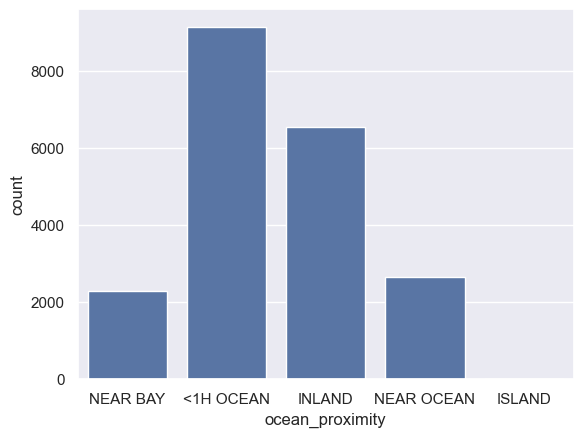

In [55]:
sns.countplot(x='ocean_proximity',data=df)

In [56]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

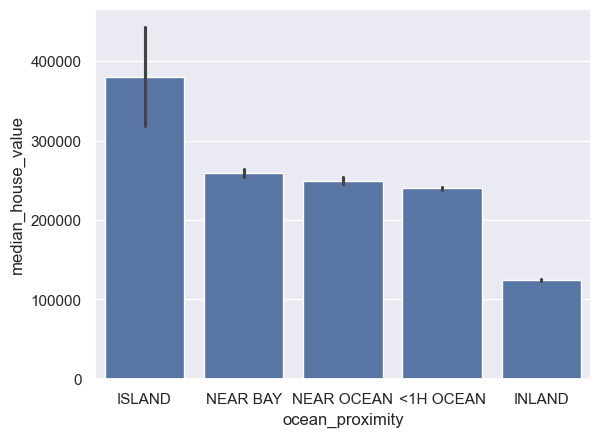

In [57]:
order = (
    df.groupby('ocean_proximity')['median_house_value']
      .mean()
      .sort_values(ascending=False)
      .index
)
sns.barplot(
    data=df,
    x='ocean_proximity',
    y='median_house_value',
    order=order
)

#### ocean_proximity plays a major role in pricing

#### households per region

<Axes: xlabel='ocean_proximity', ylabel='households'>

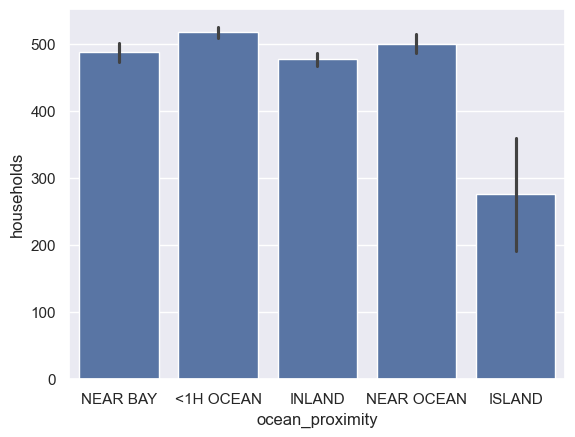

In [60]:
sns.barplot(x='ocean_proximity',y='households',data=df)

In [61]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

#### house prices per region

<Axes: xlabel='ocean_proximity', ylabel='housing_median_age'>

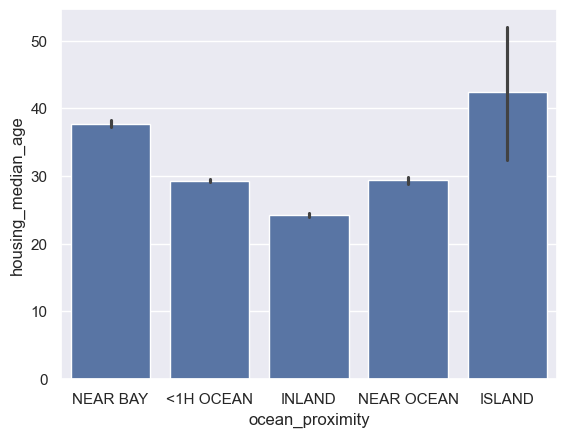

In [63]:
sns.barplot(x='ocean_proximity',y='housing_median_age',data=df)

<Axes: xlabel='ocean_proximity', ylabel='total_rooms'>

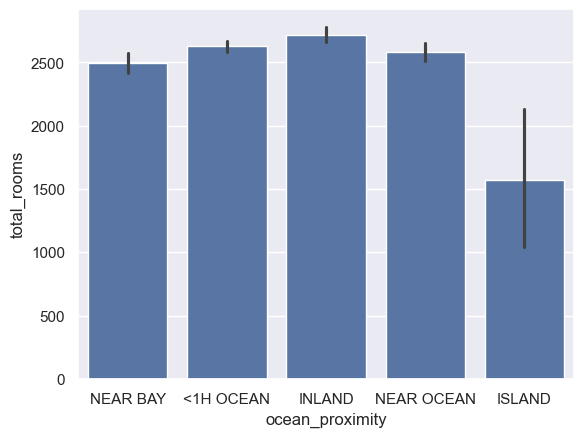

In [64]:
sns.barplot(x='ocean_proximity',y='total_rooms',data=df)

## Correlation Analysis

In [66]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [67]:
pearson=df.corr(numeric_only=True,method='pearson')['median_house_value']
pearson

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049457
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [68]:
spearman=df.corr(numeric_only=True, method='spearman')['median_house_value']
spearman

longitude            -0.069667
latitude             -0.165739
housing_median_age    0.074855
total_rooms           0.205952
total_bedrooms        0.085671
population            0.003839
households            0.112737
median_income         0.676778
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [69]:
compare_corr=pd.concat([pearson,spearman],axis=1)
compare_corr.columns=['pearson','spearman']
compare_corr=compare_corr.sort_values(by='spearman',ascending=False)
compare_corr

,pearson,spearman
median_house_value,1.000000,1.000000
median_income,0.688075,0.676778
total_rooms,0.134153,0.205952
households,0.065843,0.112737
total_bedrooms,0.049457,0.085671
housing_median_age,0.105623,0.074855
population,-0.024650,0.003839
longitude,-0.045967,-0.069667
latitude,-0.144160,-0.165739


#### longitude has  very weak spatial effect, latitude has weak spatial effect, median income seems like dominating the pricing and earlier we discovered ocean_proximity has a decisive role in the pricing

#### building some new features for better insight

In [72]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [73]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17643,-121.90,37.27,28.0,4538.0,685.0,1996.0,667.0,5.4609,263600.0,<1H OCEAN,6.803598,0.150948,2.992504
9584,-120.49,37.32,13.0,3474.0,927.0,2149.0,821.0,1.9528,85300.0,INLAND,4.231425,0.266839,2.617540
874,-122.03,37.56,31.0,4981.0,964.0,2841.0,924.0,4.8962,220200.0,NEAR BAY,5.390693,0.193535,3.074675
1111,-121.60,39.79,18.0,2672.0,533.0,1151.0,532.0,2.5670,102900.0,INLAND,5.022556,0.199476,2.163534
18892,-122.24,38.11,52.0,2111.0,310.0,772.0,323.0,4.7750,148200.0,NEAR BAY,6.535604,0.146850,2.390093


#### checking correlation with new features

In [75]:
pear=df.corr(numeric_only=True,method='pearson')['median_house_value']
spear=df.corr(numeric_only=True,method='spearman')['median_house_value']
new_corr=pd.concat([pear,spear],axis=1)
new_corr.columns=['pearson','spearman']
new_corr=new_corr.sort_values(by='spearman',ascending=False)
new_corr

,pearson,spearman
median_house_value,1.000000,1.000000
median_income,0.688075,0.676778
rooms_per_household,0.151948,0.263367
total_rooms,0.134153,0.205952
households,0.065843,0.112737
total_bedrooms,0.049457,0.085671
housing_median_age,0.105623,0.074855
population,-0.024650,0.003839
longitude,-0.045967,-0.069667
latitude,-0.144160,-0.165739


<Axes: xlabel='bedrooms_per_room', ylabel='Count'>

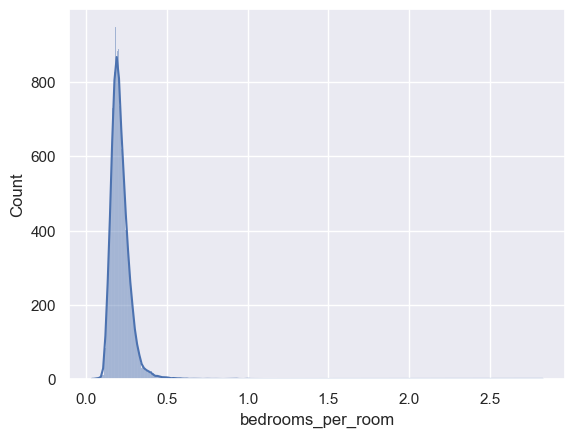

In [76]:
sns.histplot(x='bedrooms_per_room',data=df,kde=True)

#### around 20% of total rooms are bedrooms

In [134]:
df[['rooms_per_household','population_per_household','bedrooms_per_room']].describe()

,rooms_per_household,population_per_household,bedrooms_per_room
count,20640.000000,20640.000000,20640.000000
mean,5.429000,3.070655,0.213794
std,2.474173,10.386050,0.065248
min,0.846154,0.692308,0.037151
25%,4.440716,2.429741,0.175225
50%,5.229129,2.818116,0.203159
75%,6.052381,3.282261,0.240126
max,141.909091,1243.333333,2.824675


In [137]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

## BiVariate Analysis

#### Price vs Income

<Axes: xlabel='median_house_value', ylabel='median_income'>

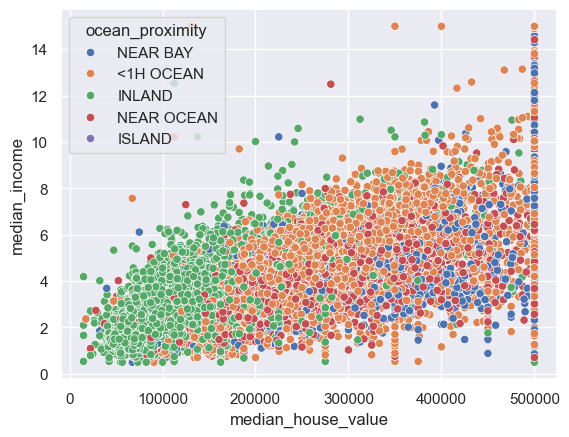

In [145]:
sns.scatterplot(x='median_house_value',y='median_income',data=df,hue='ocean_proximity')

#### positive correlation across all regions (ocean_proximity)

#### bedrooms_per_room vs price

<Axes: xlabel='median_house_value', ylabel='bedrooms_per_room'>

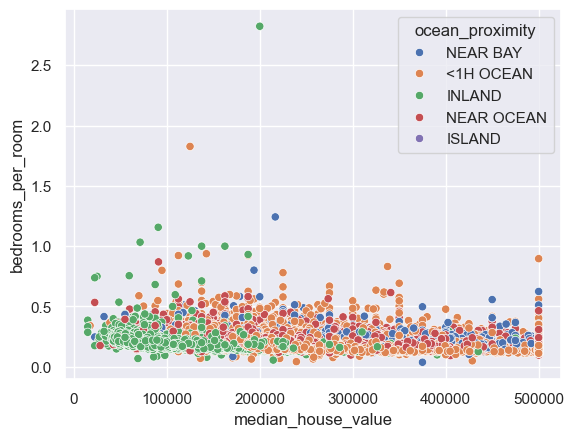

In [152]:
sns.scatterplot(x='median_house_value',y='bedrooms_per_room',data=df,hue='ocean_proximity')

#### moderate negative correlation is oberseved per region

In [155]:
new_corr

,pearson,spearman
median_house_value,1.000000,1.000000
median_income,0.688075,0.676778
rooms_per_household,0.151948,0.263367
total_rooms,0.134153,0.205952
households,0.065843,0.112737
total_bedrooms,0.049457,0.085671
housing_median_age,0.105623,0.074855
population,-0.024650,0.003839
longitude,-0.045967,-0.069667
latitude,-0.144160,-0.165739


#### population_per_household vs price

<Axes: xlabel='median_house_value', ylabel='population_per_household'>

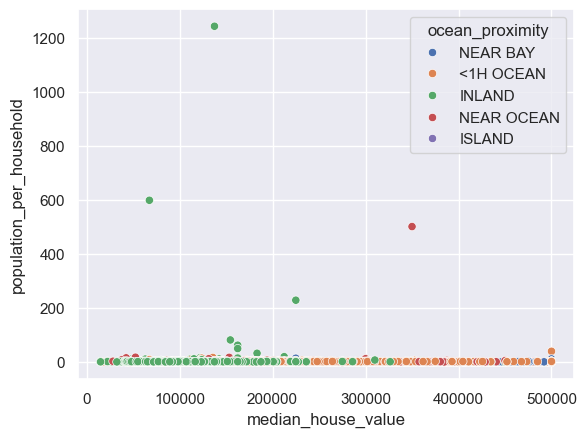

In [161]:
sns.scatterplot(x='median_house_value',y='population_per_household',data=df,hue='ocean_proximity')

Low Correlation

Pearson ≈ -0.024 → almost zero

Spearman ≈ -0.256 → weak negative monotonic trend

Confirms numerically that this feature contributes little on its own

#### definite Outliers here, or incorrect data, or exceptions like institutes like medical fascilities or prison

#### rooms_per_household vs price

<Axes: xlabel='median_house_value', ylabel='rooms_per_household'>

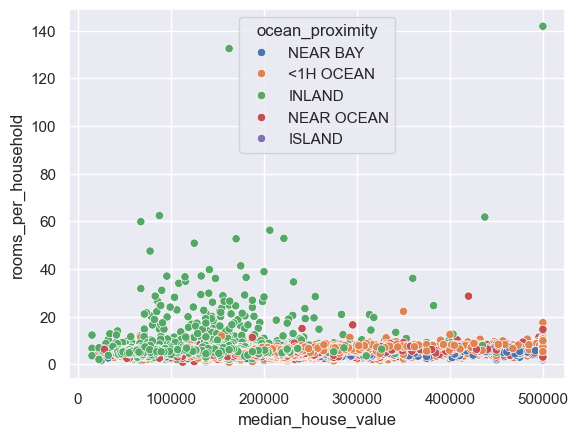

In [166]:
sns.scatterplot(x='median_house_value',y='rooms_per_household',data=df,hue='ocean_proximity')

#### can say there definitely positive correlation for inland properties, rest show very weak positive relation

## Summary

Median Income vs Price: Strong positive correlation across all regions.

Bedrooms per Room vs Price: Moderate negative correlation observed in each region; high values often capped at $500k.

Population per Household vs Price: Very weak correlation; extreme outliers exist (likely data errors or institutional residences).

Rooms per Household vs Price: Clear positive correlation for inland properties; weak positive trend in coastal regions.

Ocean Proximity is an important feature that decides price